# Excercise Computer Vision


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os

In [3]:
for directory, folder, filename in os.walk('train/'):
    print(f"There are {len(filename)} images and {len(folder)} folders in {directory}")

In [5]:
image=plt.imread('data/train/bolt/img_0 (1).jpg')

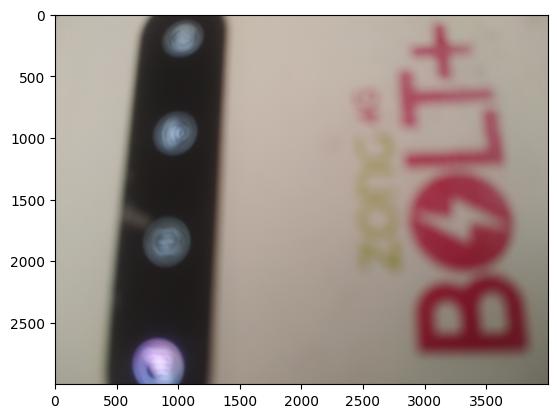

In [6]:
plt.figure()
plt.imshow(image)

In [7]:
def preprocess_img(filename, shape=(224,224)):
  img=tf.io.read_file(filename)
  img= tf.image.decode_image(img, channels=3)
  img= tf.image.resize(img,size=(224,224))
  img= img/255.
  img= tf.expand_dims(img, axis=0)
  return img

In [8]:
train_dir='data/train'

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen= ImageDataGenerator(rescale=1/255.)

In [11]:
train_data= train_datagen.flow_from_directory(train_dir,
                                             class_mode='binary',
                                             target_size=(224,224))

Found 42 images belonging to 2 classes.


In [12]:
images, labels=train_data.next()

In [13]:
images

array([[[[0.78823537, 0.79215693, 0.8000001 ],
         [0.76470596, 0.78823537, 0.78823537],
         [0.76470596, 0.78823537, 0.78823537],
         ...,
         [0.2784314 , 0.2627451 , 0.21568629],
         [0.32941177, 0.30588236, 0.2509804 ],
         [0.3019608 , 0.29411766, 0.24705884]],

        [[0.7686275 , 0.7843138 , 0.7960785 ],
         [0.7843138 , 0.80392164, 0.81568635],
         [0.7725491 , 0.80392164, 0.8117648 ],
         ...,
         [0.3254902 , 0.2784314 , 0.21568629],
         [0.31764707, 0.27450982, 0.20392159],
         [0.27058825, 0.25882354, 0.20000002]],

        [[0.7725491 , 0.79215693, 0.80392164],
         [0.77647066, 0.7960785 , 0.8078432 ],
         [0.77647066, 0.7960785 , 0.8117648 ],
         ...,
         [0.33333334, 0.28627452, 0.20000002],
         [0.30980393, 0.25882354, 0.19215688],
         [0.2901961 , 0.26666668, 0.21960786]],

        ...,

        [[0.30588236, 0.33333334, 0.3019608 ],
         [0.29803923, 0.3372549 , 0.29411766]

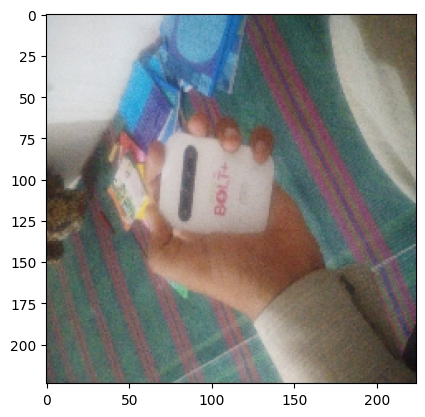

In [14]:
plt.figure()
plt.imshow(images[0])

In [15]:
images[0].shape

(224, 224, 3)

In [16]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,1,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [17]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [18]:
history=model.fit(train_data,
         epochs=20,
         steps_per_epoch=len(train_data))

Epoch 1/20
2/2 [==============================] - 7s 4s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 5s 4s/step - loss: 0.6868 - accuracy: 0.7619
Epoch 3/20
2/2 [==============================] - 5s 961ms/step - loss: 0.6754 - accuracy: 0.8810
Epoch 4/20
2/2 [==============================] - 5s 4s/step - loss: 0.6623 - accuracy: 0.8333
Epoch 5/20
2/2 [==============================] - 5s 4s/step - loss: 0.6470 - accuracy: 0.8095
Epoch 6/20
2/2 [==============================] - 5s 964ms/step - loss: 0.6315 - accuracy: 0.8095
Epoch 7/20
2/2 [==============================] - 5s 1s/step - loss: 0.6060 - accuracy: 0.8810
Epoch 8/20
2/2 [==============================] - 6s 4s/step - loss: 0.5640 - accuracy: 0.8810
Epoch 9/20
2/2 [==============================] - 6s 5s/step - loss: 0.5199 - accuracy: 0.9048
Epoch 10/20
2/2 [==============================] - 5s 4s/step - loss: 0.4687 - accuracy: 0.9762
Epoch 11/20
2/2 [==========================

<Axes: >

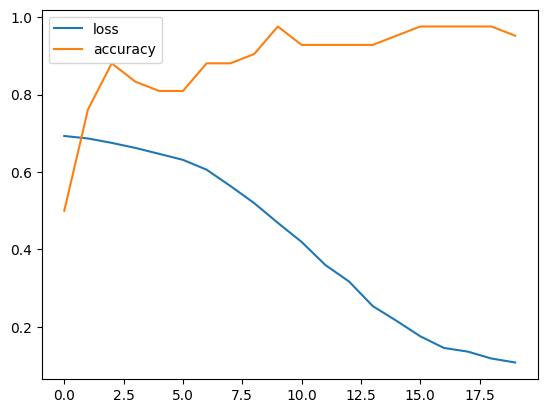

In [19]:
pd.DataFrame(history.history).plot()

In [20]:
image=preprocess_img('data/2023-07-07-13-45-56-411.jpg')

In [21]:
pred=model.predict(image)

1/1 [==============================] - 0s 152ms/step


In [22]:
pred

array([[0.9955275]], dtype=float32)

In [23]:
tf.round(pred)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [24]:
image_1=preprocess_img('data/2023-07-07-13-47-44-919.jpg')

In [25]:
pred=model.predict(image_1)

1/1 [==============================] - 0s 41ms/step


In [27]:
def decode_proba(pred):
    if tf.round(pred)!=1:
        print('This is a bolt')
    else:
        print('This is a handsfree')

In [28]:
decode_proba(pred)

This is a bolt


# DONE